# Contributes progeny by cell
This notebook annotates each infected cell by whether it contributes any progeny to the supernatant and second_infection

Import python modules:


In [1]:
from IPython.display import display

from dms_variants.constants import CBPALETTE

import pandas as pd

import plotnine as p9

Hardcode variables for now:

In [2]:
transcription_progeny_csv = 'results/viral_fastq10x/scProgenyProduction_trial3_transcription_progeny.csv.gz'
expt = 'scProgenyProduction_trial3'

Style parameters. *N.b.* `CBPALETTE` is defined in imports above.

In [3]:
p9.theme_set(p9.theme_classic())

## Load data
Load data on viral barcodes in each infected cell and frequency of those viral barcodes in each progeny sample

In [4]:
viral_barcode_freqs = pd.read_csv(transcription_progeny_csv)
display(viral_barcode_freqs)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,gene,source,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,progeny_freq
0,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,fluHA,second_infection,AAGTAAGCGACATGAG,251.0,0.002019,0.00001
1,AAAGGATTCTGATGGT,infected,syn,80029,3893,0.048645,fluHA,second_infection,GTGGAGTCGCCAGTTC,114.0,0.001424,0.00001
2,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,AAAGTGATCCCCATAC,8.0,0.000395,0.00001
3,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CATTTAACGCTGTGAG,15.0,0.000741,0.00001
4,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CGTAGGATGTTGCGTC,31.0,0.001532,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...
2261,TTTAGTCCATCATCCC,infected,wt,23766,1216,0.051166,fluNA,supernatant,TTGGACGCATTGCAAA,18.0,0.000757,0.00001
2262,TTTAGTCGTGCTCCGA,infected,wt,195173,6905,0.035379,fluNA,supernatant,NaN,NaN,NaN,NaN
2263,TTTCACAAGCCAAGCA,infected,wt,68424,2308,0.033731,fluNA,supernatant,GGTATCAGTTATTGTT,186.0,0.002718,0.00001
2264,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937,fluNA,supernatant,NaN,NaN,NaN,NaN


Annotate whether each cell has a viral barcode detected on each barcoded gene:

In [6]:
viral_barcode_freqs = viral_barcode_freqs.assign(
    viral_bc_detected=lambda x: x['viral_barcode'].notnull()
)
display(viral_barcode_freqs)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,gene,source,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,progeny_freq,viral_bc_detected
0,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,fluHA,second_infection,AAGTAAGCGACATGAG,251.0,0.002019,0.00001,True
1,AAAGGATTCTGATGGT,infected,syn,80029,3893,0.048645,fluHA,second_infection,GTGGAGTCGCCAGTTC,114.0,0.001424,0.00001,True
2,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,AAAGTGATCCCCATAC,8.0,0.000395,0.00001,True
3,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CATTTAACGCTGTGAG,15.0,0.000741,0.00001,True
4,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CGTAGGATGTTGCGTC,31.0,0.001532,0.00001,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,TTTAGTCCATCATCCC,infected,wt,23766,1216,0.051166,fluNA,supernatant,TTGGACGCATTGCAAA,18.0,0.000757,0.00001,True
2262,TTTAGTCGTGCTCCGA,infected,wt,195173,6905,0.035379,fluNA,supernatant,NaN,NaN,NaN,NaN,False
2263,TTTCACAAGCCAAGCA,infected,wt,68424,2308,0.033731,fluNA,supernatant,GGTATCAGTTATTGTT,186.0,0.002718,0.00001,True
2264,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937,fluNA,supernatant,NaN,NaN,NaN,NaN,False


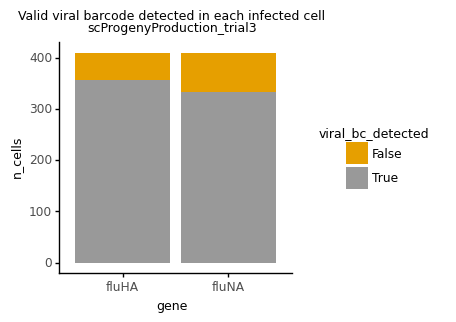

<ggplot: (8752834524438)>

In [32]:
viral_bc_detected_counts_df = (
    viral_barcode_freqs
    .groupby(['gene', 'viral_bc_detected'])
    ['cell_barcode']
    .nunique()
    .reset_index()
    .rename(columns={'cell_barcode': 'n_cells'}))

viral_bc_detected_counts = (
    p9.ggplot(viral_bc_detected_counts_df,
              p9.aes(x='gene',
                     y='n_cells',
                     fill='viral_bc_detected')) +
    p9.geom_bar(stat='identity') +
    p9.ggtitle('Valid viral barcode detected in each infected cell\n'
               f'{expt}') +
    p9.theme(figure_size=(3, 3),
                plot_title=p9.element_text(size=9),
                axis_title=p9.element_text(size=9),
                legend_title=p9.element_text(size=9),
                legend_title_align='center') +
    p9.scale_fill_manual([CBPALETTE[1], CBPALETTE[0]]))
display(viral_bc_detected_counts)

Annotate whether cell contributes progeny. If viral barcode is not detected on gene, annotate as "viral barcode not detected"

In [45]:
def check_contributes_progeny(row):
    if row['viral_bc_detected'] == False:
        return "viral bc not detected"
    elif row['progeny_freq'] > 1e-5:
        return True
    else: return False

viral_barcode_freqs['contributes_progeny'] = (
    viral_barcode_freqs
    .apply(check_contributes_progeny, axis=1))

display(viral_barcode_freqs)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,gene,source,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,progeny_freq,viral_bc_detected,contributes_progeny
0,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,fluHA,second_infection,AAGTAAGCGACATGAG,251.0,0.002019,0.00001,True,False
1,AAAGGATTCTGATGGT,infected,syn,80029,3893,0.048645,fluHA,second_infection,GTGGAGTCGCCAGTTC,114.0,0.001424,0.00001,True,False
2,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,AAAGTGATCCCCATAC,8.0,0.000395,0.00001,True,False
3,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CATTTAACGCTGTGAG,15.0,0.000741,0.00001,True,False
4,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CGTAGGATGTTGCGTC,31.0,0.001532,0.00001,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,TTTAGTCCATCATCCC,infected,wt,23766,1216,0.051166,fluNA,supernatant,TTGGACGCATTGCAAA,18.0,0.000757,0.00001,True,False
2262,TTTAGTCGTGCTCCGA,infected,wt,195173,6905,0.035379,fluNA,supernatant,NaN,NaN,NaN,NaN,False,viral bc not detected
2263,TTTCACAAGCCAAGCA,infected,wt,68424,2308,0.033731,fluNA,supernatant,GGTATCAGTTATTGTT,186.0,0.002718,0.00001,True,False
2264,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937,fluNA,supernatant,NaN,NaN,NaN,NaN,False,viral bc not detected
